# Analiza podatkov rabljenih plovil

V tem besedilu so analizirani podatki rabljenih plovil, ki so bili zajeti s strani [Boat24](https://www.boat24.com/en/) in obdelani s pomočjo Pythona in Jupyter Notebooka.

## Uvod

"Vodno plovilo" je izraz v slovenščini, ki se nanaša na plovilo ali vozilo, ki se premika po vodni površini, kot so reke, jezera, morja in kanali. To vključuje različne vrste plovil, kot so ladje, čolni, jadrnice, podmornice, kajaki, kanuji in druga plovila. Vodna plovila se uporabljajo za prevoz ljudi, tovora, vojske, raziskovanje, turizem, šport in druge namene.

V tej analizi se bomo najbolj posvetili plovilom za osebno rabo, ki za svoj pogon pretežno uporabljajo jadra ali motor in so na prodaj v Sloveniji in na Hrvaškem na spletni strani [Boat24](https://www.boat24.com/en/).

In [1]:
import pandas as pd

barke_brez_kategorij = pd.read_csv("C:/Users/peter/Documents/Faks/UvP/Analiza-podatkov-rabljenih-plovil/Barke_csv/barke_brez_kategorij.csv")
kategorije = pd.read_csv("C:/Users/peter/Documents/Faks/UvP/Analiza-podatkov-rabljenih-plovil/Barke_csv/kategorije.csv")
zdruzena = pd.merge(barke_brez_kategorij, kategorije, left_on="id", right_on="id")
zdruzena

,id,ime,dolzina,sirina,leto,uporabljenost,cena,lokacija,kategorija
0,517178,Wim van der Valk 37 M Explorer,36.80,7.75,2015,Used Boat,12900000,Croatia,Superyacht
1,534942,ISA Yachts Isa 120 Sport,36.45,7.40,2017,Used Boat,9500000,Croatia,Superyacht
2,536075,Maiora 33 DP,33.00,6.76,2007,Used Boat,3600000,Croatia,Superyacht
3,524618,"San Lorenzo San Lorenzo 108""",32.92,7.32,2008,Used Boat,3990000,Croatia,Superyacht
4,495348,Ferretti Custom Line 108,32.90,7.75,2016,Used Boat,7800000,Croatia,Superyacht
...,...,...,...,...,...,...,...,...,...
1306,532387,Pirelli J33 Jet,3.30,1.67,2018,Used Boat,18900,Croatia,RIB
1307,550915,Zodiac 3.20,3.20,1.80,2023,New boat preordered,18240,Slovenia,RIB
1308,542052,Williams 285 Turbojet,2.90,1.60,2010,Used Boat,11450,Croatia,RIB
1309,537400,Tiwal 2 Yellow furling sail 5.60 m2,2.80,1.50,2021,Used Boat,9000,Croatia,Dinghy


V zgornji tabeli so predstavljeni csi podatki bark, ki smo jih zajeli. V vsaki vrstici je zapisana svoja barka,ki je na prodaj. Tiste barke, ki spadajo v več kategorij so zaradi lažje nadaljne obdelave, za vsako kategorijo zapisane v dodatno vrstico.

<Axes: xlabel='kategorija'>

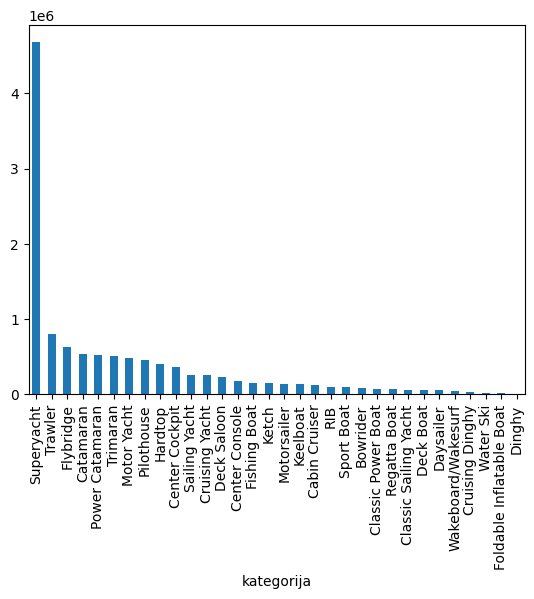

In [2]:
zdruzena.groupby("kategorija").mean(numeric_only=True).sort_values('cena', ascending=False).cena.plot.bar()

Kot pričakovano vidimo, da so barke iz kategorije superjaht v povprečju najdražje.

In [3]:
import numpy as np
zdruzena['cena na kvadratni meter'] = (zdruzena['cena'] * 4) / (np.pi * zdruzena['dolzina'] * zdruzena['sirina'])
povprecne_cene_na_kvadratni_meter_na_kategorijo = zdruzena.groupby(["kategorija", "lokacija"]).mean(numeric_only=True).sort_values(['kategorija', 'cena na kvadratni meter'])['cena na kvadratni meter']
povprecne_cene_na_kvadratni_meter = zdruzena.groupby("lokacija").mean(numeric_only=True).sort_values('cena na kvadratni meter')['cena na kvadratni meter']
povprecne_cene_na_kvadratni_meter

lokacija
Croatia      6672.759914
Slovenia    10126.173820
Name: cena na kvadratni meter, dtype: float64

Vidimo, da dobimo na hrvaškem v povprečju več barke za naš denar. V nadaljnjem bomo to razmerje pogledali še za kategorije in letnice izdelave barke.

In [4]:
hrvaske_kategorije = zdruzena[zdruzena['lokacija'] == 'Croatia']['kategorija'].nunique()
vse_kategorije = zdruzena['kategorija'].nunique()
slovenske_kategorije = zdruzena[zdruzena['lokacija'] == 'Slovenia']['kategorija'].nunique()
f"Število vseh kategorij: {vse_kategorije}, število kategorij na voljo na Hrvaški: {hrvaske_kategorije}, število kategorij na voljo v Sloveniji: {slovenske_kategorije}."

'Število vseh kategorij: 32, število kategorij na voljo na Hrvaški: 31, število kategorij na voljo v Sloveniji: 14.'

Kot vidimo zgoraj nam vključitev hrvaškega trga ponuja veliko večjo izbiro kategorij, kot če bi se omejili le na slovenski trg.

In [5]:
povp_cene_kat = zdruzena.groupby(['lokacija', 'kategorija'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje_kat = povp_cene_kat['Slovenia']/povp_cene_kat['Croatia']
razmerje_kat.dropna()

kategorija
Cabin Cruiser     0.954301
Center Console    2.173528
Daysailer         0.888848
Flybridge         1.196569
Hardtop           1.119286
Motor Yacht       1.411420
Motorsailer       0.858622
Pilothouse        2.745460
RIB               1.095407
Regatta Boat      1.396334
Sailing Yacht     1.680533
Sport Boat        1.510818
Trawler           2.976946
Name: cena na kvadratni meter, dtype: float64

Kot vidimo iz podatkov dobimo v Sloveniji v povprečju večjo površino barke za naš denar za le 3 kategoije izmed 13 skupnih.

In [6]:
povp_cene_leto = zdruzena.groupby(['lokacija', 'leto'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje_leto = povp_cene_leto['Slovenia']/povp_cene_leto['Croatia']
hrvaska_boljse = razmerje_leto[razmerje_leto > 1].count()
slovenija_boljse = razmerje_leto[razmerje_leto < 1].count()
enaka_leta = razmerje_leto.dropna().count()
print(
    f"Če barke primerjamo po starosti, dobimo {enaka_leta}, od katerih dobimo v {hrvaska_boljse} " +
    f"primerih v povprečju boljšo ponudbo na Hrvaškem in v {slovenija_boljse} primerih pa v Sloveniji."
    )

Če barke primerjamo po starosti, dobimo 27, od katerih dobimo v 12 primerih v povprečju boljšo ponudbo na Hrvaškem in v 15 primerih pa v Sloveniji.


Tukaj vdimo, da morda ni nujno, da dobimo na hrvaškem boljše ponudbe in so bili lahko predhodne ugotovitve zavajujoče zaradi pomanjkljivih podatkov o starosti barke.

In [7]:
povp_cene = zdruzena.groupby(['lokacija', 'kategorija', 'leto'])['cena na kvadratni meter'].mean(numeric_only=True)
razmerje = povp_cene['Slovenia']/povp_cene['Croatia']
hrvaska = razmerje[razmerje > 1].count()
slovenija = razmerje[razmerje < 1].count()
enaka = razmerje.dropna().count()
print(
    f"Če barke primerjamo po starosti in kategoriji, dobimo {enaka}, od katerih dobimo v {hrvaska} " +
    f"primerih v povprečju boljšo ponudbo na Hrvaškem in v {slovenija} primerih pa v Sloveniji."
    )

Če barke primerjamo po starosti in kategoriji, dobimo 53, od katerih dobimo v 23 primerih v povprečju boljšo ponudbo na Hrvaškem in v 30 primerih pa v Sloveniji.


Kot vidimo iz zadnje primerjave, hipoteze, da so na hrvaškem boljše ponudbe za barke ne moremo potrditi in jo lahko morda celo ovržemo.

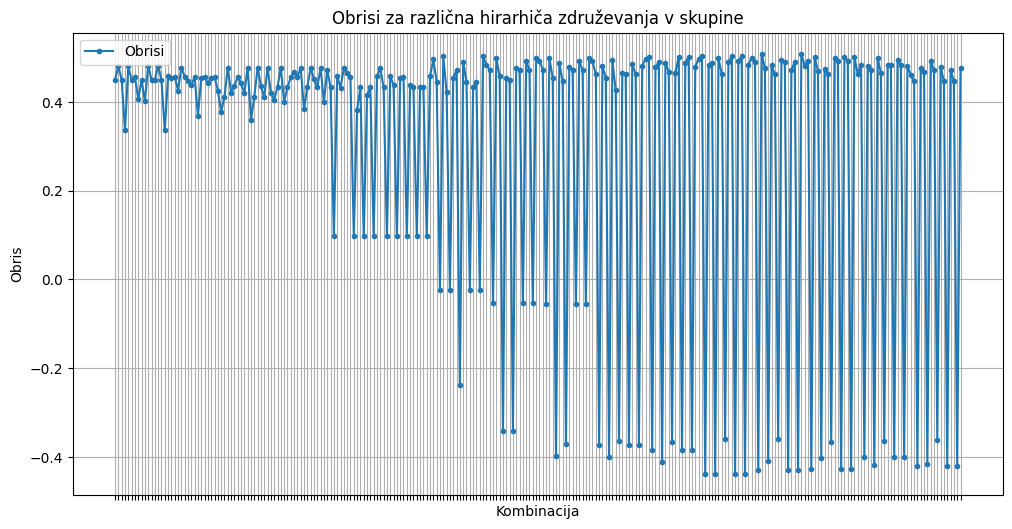

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

razvrscanje_bark = barke_brez_kategorij.iloc[:, [2, 3, 4]]
normalizirano = normalize(razvrscanje_bark)
normalizirano = pd.DataFrame(normalizirano)

razdalje = [
    ['euclidean', 'ward'], ['euclidean', 'complete'], ['euclidean', 'single'], ['euclidean', 'average'],
    ['manhattan', 'complete'], ['manhattan', 'single'], ['manhattan', 'average'],
    ['chebyshev', 'complete'],  ['chebyshev', 'single'], ['chebyshev', 'average'],
    ['cosine', 'complete'], ['cosine', 'single'], ['cosine', 'average'],
    ['minkowski', 'complete'], ['minkowski', 'single'], ['minkowski', 'average']
    ]

norm_obrisi = []
for n_skupin in range(4, 20):
    for metric, linkage in razdalje:
        norm_zdruzevanje = AgglomerativeClustering(n_clusters=n_skupin, linkage=linkage, metric=metric)
        norm_oznake = norm_zdruzevanje.fit_predict(normalizirano)
        norm_povprecje_obrisa = silhouette_score(normalizirano, norm_oznake)
        norm_obrisi.append(norm_povprecje_obrisa)

norm_optimalno_st_skupin = np.argmax(norm_obrisi) + 2
norm_optimalno_razvrscanje = AgglomerativeClustering(n_clusters=norm_optimalno_st_skupin)
norm_optimalne_oznake = norm_optimalno_razvrscanje.fit_predict(normalizirano)
norm_optimalen_obris = max(norm_obrisi)

kombinacije = []
komb = [
    'euclidean_ward', 'euclidean_complete', 'euclidean_single', 'euclidean_average',
    'manhattan_complete', 'manhattan_single', 'manhattan_average',
    'chebyshev_complete', 'chebyshev_single', 'chebyshev_average',
    'cosine_complete', 'cosine_single', 'cosine_average',
    'minkowski_complete', 'minkowski_single', 'minkowski_average'
    ]
for n in range(4, 20):
    for e in komb:
        e = e + f'_{n}'
        kombinacije.append(e)


plt.figure(figsize=(12, 6))
plt.tick_params(labelbottom = False)
plt.plot(kombinacije, norm_obrisi, marker='.', label='Obrisi')
plt.xlabel('Kombinacija')
plt.ylabel('Obris')
plt.title('Obrisi za različna hirarhiča združevanja v skupine')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
opti = np.argmax(norm_obrisi)
optimalna_izbira = (kombinacije[opti].split('_'), norm_obrisi[opti])
opt_linkage = optimalna_izbira[0][1]
opt_metric = optimalna_izbira[0][0]
opt_st_skupin = int(optimalna_izbira[0][2])
f"Optimalna kombinacija mere razdalje med objekti in skupinami je {opt_linkage, opt_metric}, optimalno število skupin pa je {opt_st_skupin}"

"Optimalna kombinacija mere razdalje med objekti in skupinami je ('average', 'euclidean'), optimalno število skupin pa je 16"

In [10]:
opt_linkage = optimalna_izbira[0][1]
opt_metric = optimalna_izbira[0][0]
opt_st_skupin = int(optimalna_izbira[0][2])

clusterer = AgglomerativeClustering(n_clusters=opt_st_skupin, metric=opt_metric, linkage=opt_linkage)
clusters = clusterer.fit_predict(normalizirano)

barke_brez_kategorij['skupina'] = clusters
barke_brez_kategorij['cena na kvadratni meter'] = (barke_brez_kategorij['cena'] * 4) / (np.pi * barke_brez_kategorij['dolzina'] * barke_brez_kategorij['sirina'])
barke_brez_kategorij.sort_values('cena na kvadratni meter').head(20)

,id,ime,dolzina,sirina,leto,uporabljenost,cena,lokacija,skupina,cena na kvadratni meter
1019,552446,Rinker V190,7.00,2.60,1990,Used Boat,5500,Croatia,12,384.770192
921,507247,Sparkman & Stephens 6.6,9.10,2.85,1971,Used Boat,8000,Croatia,6,392.747883
765,447706,Hucky Ketch 37,10.86,3.45,2013,Used Boat,11800,Croatia,2,400.998922
1062,548807,Zodiac Cadet RIB compact 250,2.50,1.56,2019,Used Boat,1500,Croatia,5,489.707517
471,516559,Sammler,13.40,3.40,2005,Used Boat,19000,Croatia,7,530.982251
979,526662,Neptun Werft NEPTUN 27,8.15,2.50,1978,Used Boat,9000,Croatia,6,562.412560
574,546069,Johnson 42,12.41,4.42,1993,Used Boat,25000,Croatia,2,580.304685
995,541808,Albin 79,7.90,2.66,1976,Used Boat,9999,Croatia,6,605.840021
990,549911,Ho?evar 800,7.96,2.98,1987,Used Boat,12000,Croatia,6,644.112953
862,548178,Einzelbau,9.80,2.70,1968,Used Boat,14500,Croatia,6,697.731421


In [11]:
st_prikazanih_bark_na_skupino = 3
for i in range(opt_st_skupin):
    print(barke_brez_kategorij[barke_brez_kategorij.skupina == i].sort_values('cena na kvadratni meter').head(st_prikazanih_bark_na_skupino))

         id           ime  dolzina  sirina  leto uporabljenost    cena  \
91   550004    Canados 70    20.00    4.65  1984     Used Boat  120000   
136  552477  Ferretti 592    18.33    5.25  1995     Used Boat  134000   
117  525116      Astor 59    18.90    4.90  1991     Used Boat  139000   

    lokacija  skupina  cena na kvadratni meter  
91   Croatia        0              1642.889735  
136  Croatia        0              1772.936368  
117  Croatia        0              1911.027931  
        id                    ime  dolzina  sirina  leto uporabljenost  \
35  538751            Elegance 76     23.0     5.7  2002     Used Boat   
31  530237  Mochi Craft 22,5 Axis     23.6     6.6  2003     Used Boat   
22  531499          Sanlorenzo 82     25.0     6.0  2000     Used Boat   

      cena lokacija  skupina  cena na kvadratni meter  
35  590000  Croatia        1              5730.063550  
31  770000  Croatia        1              6294.263286  
22  749000  Croatia        1              

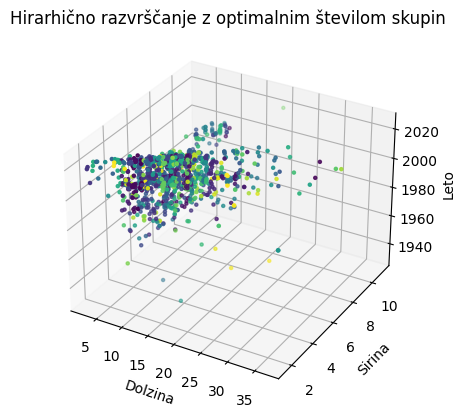

In [12]:
risba = plt.figure()
os = risba.add_subplot(projection='3d')
os.scatter(razvrscanje_bark.iloc[:, 0], razvrscanje_bark.iloc[:, 1], razvrscanje_bark.iloc[:, 2], c=norm_optimalne_oznake, marker =".")
os.set_xlabel('Dolzina')
os.set_ylabel('Sirina')
os.set_zlabel('Leto', rotation=90)
os.set_title('Hirarhično razvrščanje z optimalnim številom skupin')
plt.show()

In [13]:
barke_brez_kategorij['skupina'].value_counts()

skupina
2     240
6     203
4     168
7     167
0      81
12     48
13     46
10     31
14     28
1      17
5      12
3      11
9       4
11      4
8       2
15      1
Name: count, dtype: int64

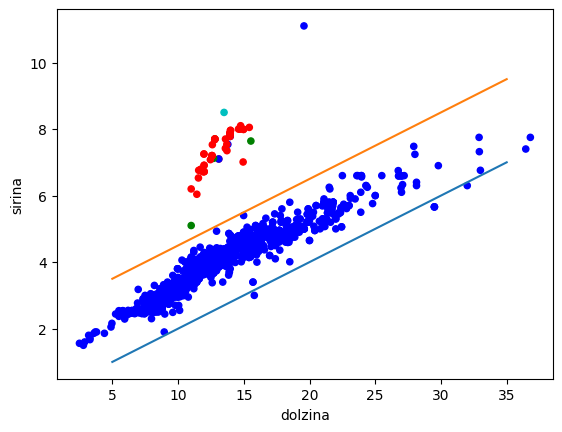

In [14]:
barva = []
for i in zdruzena['kategorija']:
    if i == 'Power Catamaran':
        barva.append('g')
    elif i == 'Catamaran':
        barva.append('r')
    elif i == 'Trimaran':
        barva.append('c')
    else:
        barva.append('b')

zdruzena.plot.scatter(x='dolzina', y='sirina', c=barva)
plt.plot([5, 35], [1, 7])
plt.plot([5, 35], [3.5, 9.5])

Iz grafa vidimo, da se večina bark nahaja med premico z funkcijo y = x/5 in y = x/5 + 2.5.
Večina izjem pričakovano spada med katamarane in trimarane (kategorije v tabeli zapisane kot Catamaran, Power Catamaran in Trimaran)